In [1]:
%pylab inline  
import GPy
import GPyOpt
import numpy as np
import  Functions
from Functions import *

Populating the interactive namespace from numpy and matplotlib


In [5]:
#list of one-dimensional functions from Functions.py
function_names = ['michalewicz', 'ackley1', 'gsobol', 'michalewicz5', 'sqmichalewicz5']

bounds = [{'name': 'var_1', 'type': 'continuous', 'domain': (-3,3)}]  # problem constraints 

max_iter_for_func = 30 # evaluation budget
max_time = 120     # time budget 
eps      = 10e-6  # Minimum allows distance between the las two observations
iter_opt = 50


# six arrays for storing optimal values
x_opt_without_noise = np.array([])
x_opt_with_hm_noise = np.array([])
x_opt_with_ht_noise = np.array([])

y_opt_without_noise = np.array([])
y_opt_with_hm_noise = np.array([])
y_opt_with_ht_noise = np.array([])



for name in function_names:
    x_opt_without_noise = np.array([])
    x_opt_with_hm_noise = np.array([])
    x_opt_with_ht_noise = np.array([])

    #first function - without noise    
    def f_without_noise(X):
        return functionDoESpecial (X, name)
    #second function - without homo noise  
    def f_with_hm_noise(X):
        return functionDoESpecial (X, name) + np.random.normal(loc=0.0, scale=0.05, size=(X.shape[0], 1)).reshape (-1, )        
        #third function
    def f_with_ht_noise(X):
         # target function  + heteroscadastic noise
        return functionDoESpecial (X, name)  + \
        0.07 * np.random.multivariate_normal(np.zeros(X.reshape(-1, ).shape[0]), np.diag(abs (X.reshape (-1, ))**2), 1)[0]        
           
    
    for i in range(iter_opt):
        
        bayes_opt_without_noise = GPyOpt.methods.BayesianOptimization(f = f_without_noise,# function to optimize       
                                                domain = bounds, # box-constraints of the problem
                                                acquisition_type = 'EI',
                                                exact_feval = True) # Selects the Expected improvement

        bayes_opt_without_noise.run_optimization(max_iter_for_func, max_time, eps)     
        x_opt_without_noise = np.append (x_opt_without_noise, bayes_opt_without_noise.x_opt)
        
    
        
        
        bayes_opt_with_hm_noise = GPyOpt.methods.BayesianOptimization(f=f_with_hm_noise,# function to optimize       
                                                domain=bounds, # box-constraints of the problem
                                                acquisition_type='EI',
                                                 exact_feval = True) # Selects the Expected improvement

        bayes_opt_with_hm_noise.run_optimization(max_iter_for_func, max_time, eps) 
        x_opt_with_hm_noise = np.append (x_opt_with_hm_noise, bayes_opt_with_hm_noise.x_opt)
        

        
        
        bayes_opt_with_ht_noise = GPyOpt.methods.BayesianOptimization(f=f_with_ht_noise,# function to optimize       
                                                domain=bounds, # box-constraints of the problem
                                                acquisition_type='EI',
                                                 exact_feval = True) # Selects the Expected improvement

        bayes_opt_with_ht_noise.run_optimization(max_iter_for_func, max_time, eps) 
        x_opt_with_ht_noise = np.append (x_opt_with_ht_noise, bayes_opt_with_ht_noise.x_opt)
        
    y_opt_without_noise = f_without_noise (x_opt_without_noise.reshape (-1, 1))
    y_opt_with_hm_noise = f_without_noise (x_opt_with_hm_noise.reshape (-1, 1))
    y_opt_with_ht_noise = f_without_noise (x_opt_with_ht_noise.reshape (-1, 1))
    
    print "func: ", name
    
    print "y_opt_without_noise"
    print "mean: ", y_opt_without_noise.mean(), "variance: ", y_opt_without_noise.var()
    
    print "y_opt_with_hm_noise"
    print "mean: ", y_opt_with_hm_noise.mean(), "variance: ", y_opt_with_hm_noise.var()
    
    print "y_opt_with_ht_noise"
    print "mean: ", y_opt_with_ht_noise.mean(), "variance: ", y_opt_with_ht_noise.var(),"\n"
    

func:  michalewicz
y_opt_without_noise
mean:  -0.9729589442873045 variance:  0.0002454273085987798
y_opt_with_hm_noise
mean:  -0.9374729264572582 variance:  0.0034932587804849284
y_opt_with_ht_noise
mean:  -0.8295609201515737 variance:  0.048998506112415185 

func:  ackley1
y_opt_without_noise
mean:  2.8614742967446047 variance:  0.014905799738980183
y_opt_with_hm_noise
mean:  7.398889183539772 variance:  60.86812143153419
y_opt_with_ht_noise
mean:  9.08812339140883 variance:  71.76398912432086 

func:  gsobol
y_opt_without_noise
mean:  0.8191735637067162 variance:  4.664103774000469e-07
y_opt_with_hm_noise
mean:  0.8430499680268272 variance:  0.0006101514362570656
y_opt_with_ht_noise
mean:  0.8559590298478561 variance:  0.01943988695918074 

func:  michalewicz5
y_opt_without_noise
mean:  -0.9676485069803995 variance:  0.0005458256174503309
y_opt_with_hm_noise
mean:  -0.9334061023032642 variance:  0.0025829645485434347
y_opt_with_ht_noise
mean:  -0.8803628199795398 variance:  0.0166026

Draw this functions

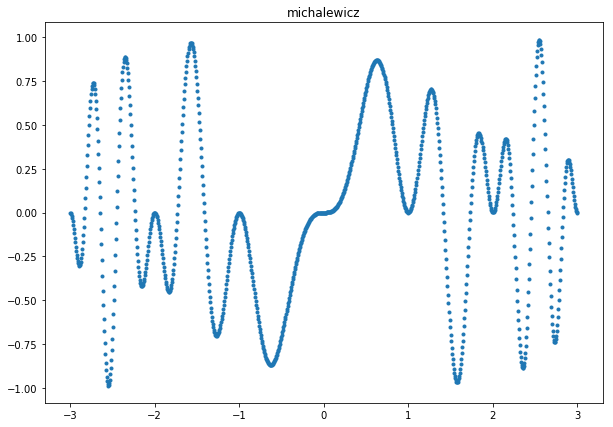

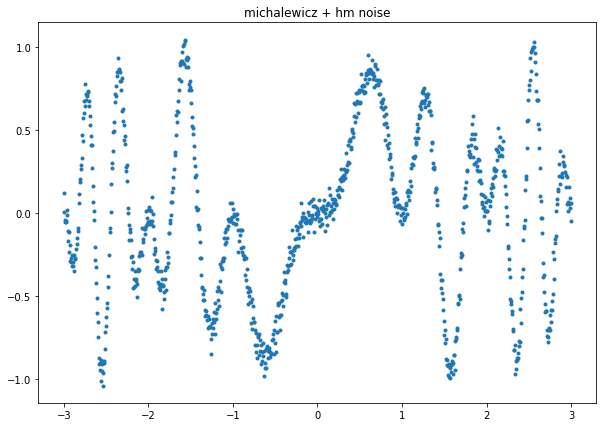

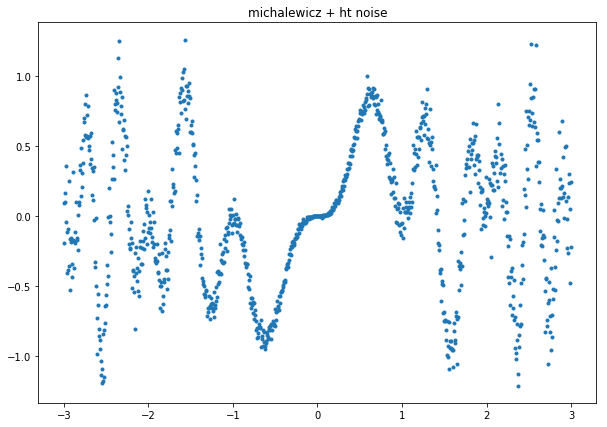

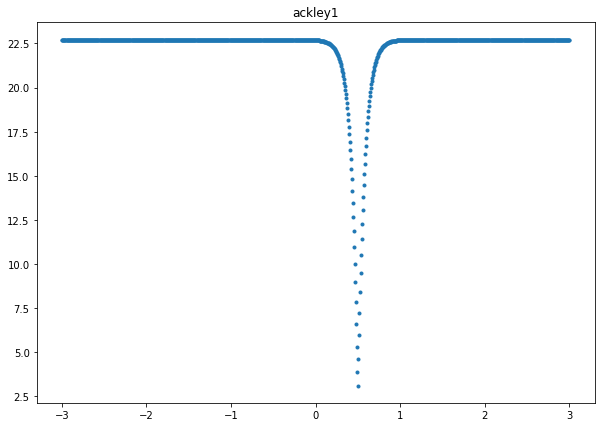

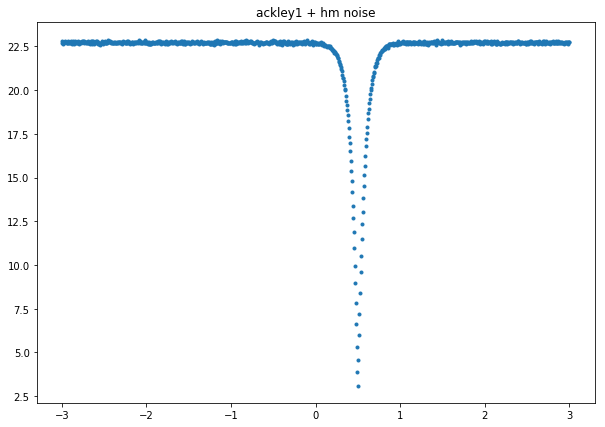

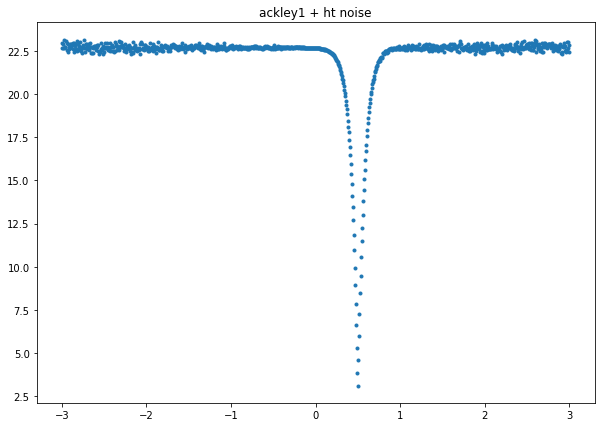

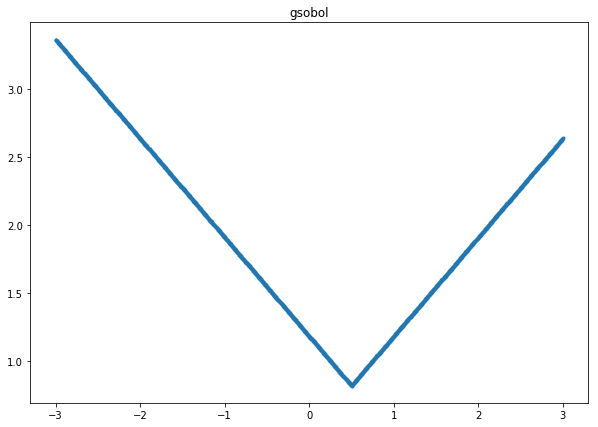

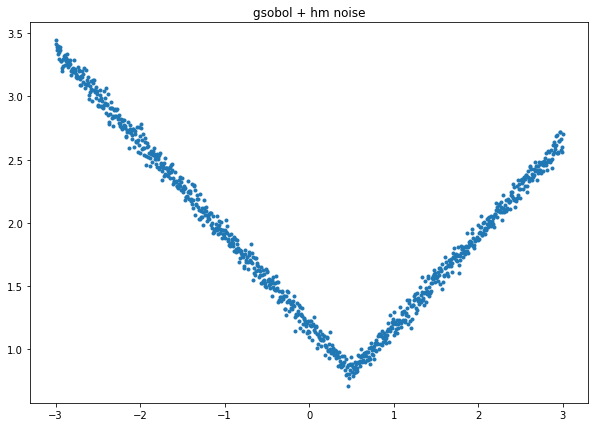

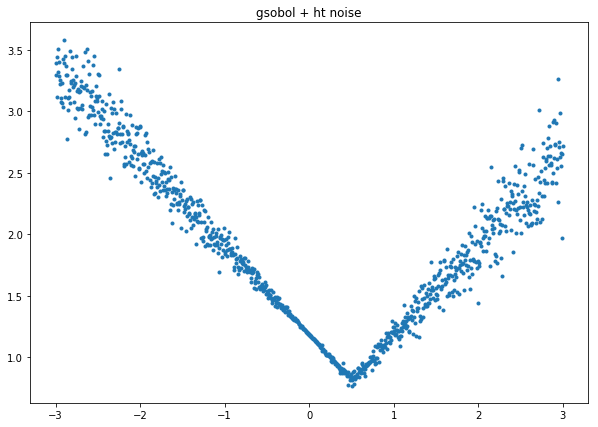

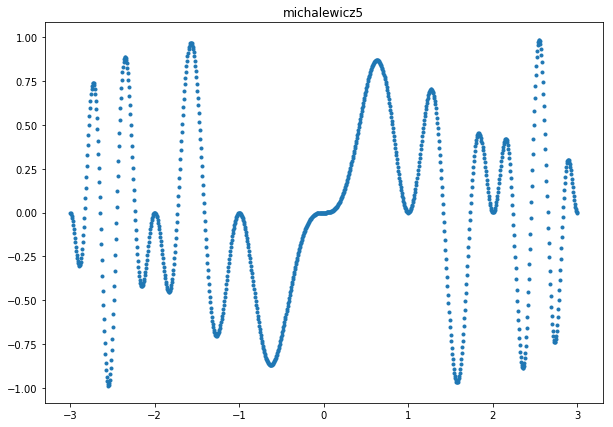

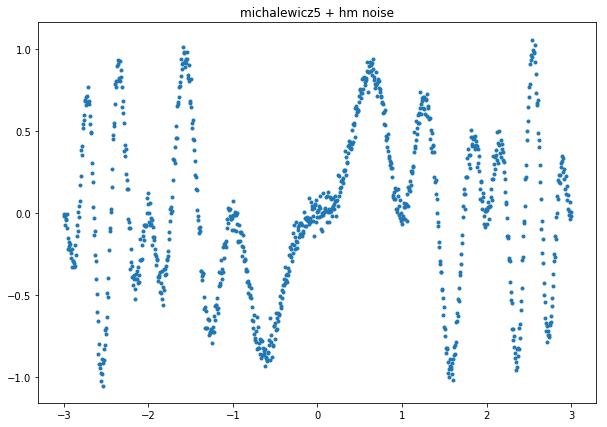

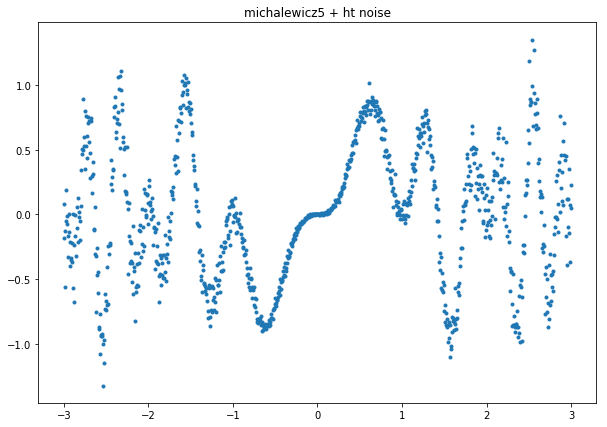

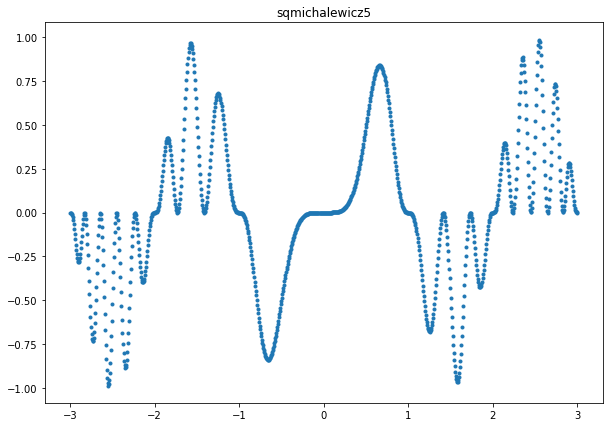

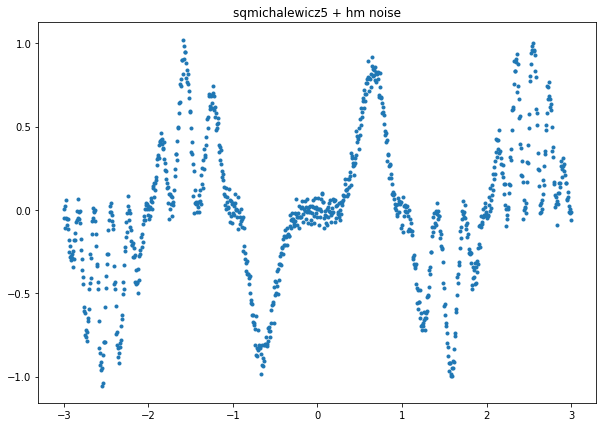

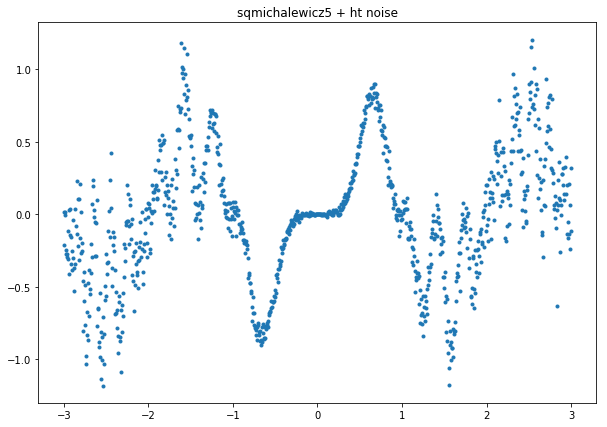

In [10]:
#list of one-dimensional functions from Functions.py
function_names = ['michalewicz', 'ackley1', 'gsobol', 'michalewicz5', 'sqmichalewicz5']


for name in function_names:
    #first function - without noise    
    def f_without_noise(X):
        return functionDoESpecial (X, name)
    #second function - without homo noise  
    def f_with_hm_noise(X):
        return functionDoESpecial (X, name) + np.random.normal(loc=0.0, scale=0.05, size=(X.shape[0], 1)).reshape (-1, )        
        #third function
    def f_with_ht_noise(X):
         #target function  + heteroscadastic noise
        return functionDoESpecial (X, name)  + \
        0.07 * np.random.multivariate_normal(np.zeros(X.reshape(-1, ).shape[0]), np.diag(abs (X.reshape (-1, ))**2), 1)[0]        
           
    N = 1000
    X = np.linspace(-3, 3, N).reshape (-1, 1)

    y = f_without_noise(X) 
    pyplot.figure(figsize = (10, 7))
    pyplot.title(name)
    pyplot.plot(X, y, '.')

    y = f_with_hm_noise(X) 
    pyplot.figure(figsize = (10, 7))
    pyplot.title(name + ' + hm noise')
    pyplot.plot(X, y, '.')
    
    y = f_with_ht_noise(X) 
    pyplot.figure(figsize = (10, 7))
    pyplot.title(name + ' + ht noise')
    pyplot.plot(X, y, '.')

